In [1]:
import warnings 
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# filter warnings
warnings.filterwarnings("ignore")

In [3]:
# load your data 
data  = pd.read_csv('diabetes.csv')
names = list(data.columns)

In [13]:
# Replace zeroes
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    data[column] = data[column].replace(0, np.NaN)
    mean = int(data[column].mean(skipna=True))
    data[column] = data[column].replace(np.NaN, mean)

# print(data['Insulin'])

In [5]:
def plot_correlation(data):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    # init figure size
    rcParams['figure.figsize'] = 15, 20
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    fig.savefig('corr.png')

In [6]:
def plot_densities(data):
    '''
    Plot features densities depending on the outcome values
    '''
    # change fig size to fit all subplots 
    rcParams['figure.figsize'] = 15, 20

    # separate data based on outcome values 
    outcome_0 = data[data['Outcome'] == 0]
    outcome_1 = data[data['Outcome'] == 1]
    
    # init figure
    fig, axs = plt.subplots(8, 1)
    fig.suptitle('Features densities for different outcomes 0/1')
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95,
                        wspace = 0.2, hspace = 0.9)
             
    # plot densities for outcomes
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        outcome_0[column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="red", legend=True,
                                    label=column_name + ' for Outcome = 0')
        outcome_1[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="green", legend=True,
                                     label=column_name + ' for Outcome = 1')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
    plt.show()
    fig.savefig('densities.png')

In [7]:
# plot correlation & densities
# plot_correlation(data)
# plot_densities(data)

In [8]:
def accuracy(k, X_train, y_train, X_test, y_test):
    '''
    compute accuracy of the classification based on k values 
    '''
    # instantiate learning model and fit data
    knn = KNeighborsClassifier(n_neighbors=k)    
    knn.fit(X_train, y_train)
    
    # predict the response
    pred = knn.predict(X_test)
    
    # evaluate and return  accuracy
    return accuracy_score(y_test, pred)

In [9]:
def optimal_k_value(X, y):
    ''' 
    iterate through different values for k
    '''
    # split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 41)
    
    # init vars
    k_values = [3, 5, 10]
    for n_neighbors in k_values:
        n_neighbors = n_neighbors
    
        # create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
        clf.fit(X_train, y_train)
        
        # print results
        print('----------------------------------------------------------------------')
        print('Accuracy = %5s' % round(accuracy(n_neighbors, X_train, y_train, X_test, y_test), 3))
        print('----------------------------------------------------------------------')

In [10]:
# we only take the best two features and prepare them for the KNN classifier
rows_nbr = 30
X_prime  = np.array(data.iloc[:rows_nbr, [1,5]])
X        = preprocessing.scale(X_prime)
X        = X_prime
y        = np.array(data.iloc[:rows_nbr, 8])

# evaluate accuracy for k values of 3, 5, and 10
optimal_k_value(X, y)

----------------------------------------------------------------------
Accuracy =   0.4
----------------------------------------------------------------------
----------------------------------------------------------------------
Accuracy =   0.4
----------------------------------------------------------------------
----------------------------------------------------------------------
Accuracy =   0.4
----------------------------------------------------------------------


In [11]:
def classify_and_plot(X, y):
    ''' 
    split data, fit, classify, plot and evaluate results 
    '''
    # split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 41)
    best_n_neighbours = np.argmax(np.array([accuracy(k, X_train, y_train, X_test, y_test) for k in range(1, int(rows_nbr/2))])) + 1
    weights = 'distance'
    print('----------------------------------------------------------------------')
    print('For best accuracy use k = ', best_n_neighbours)
    print('----------------------------------------------------------------------')
    
    # init vars
    n_neighbors = best_n_neighbours
    h           = .02  # step size in the mesh
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])
    
    rcParams['figure.figsize'] = 5, 5
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(X_train, y_train)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                                 np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()    
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot also the training points, x-axis = 'Glucose', y-axis = "BMI"
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)   
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("0/1 outcome classification (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.xlabel("Glucose")
    plt.ylabel("BMI")
    plt.show()
    fig.savefig(weights +'.png')
    
    # evaluate
    y_expected  = y_test
    y_predicted = clf.predict(X_test)
        
    # print results
    print('----------------------------------------------------------------------')
    print('Classification report')
    print('----------------------------------------------------------------------')
    print('\n', classification_report(y_expected, y_predicted))
    print('----------------------------------------------------------------------')
    print('Accuracy = %5s' % round(accuracy(n_neighbors, X_train, y_train, X_test, y_test), 3))
    print('----------------------------------------------------------------------')

----------------------------------------------------------------------
For best accuracy use k =  14
----------------------------------------------------------------------


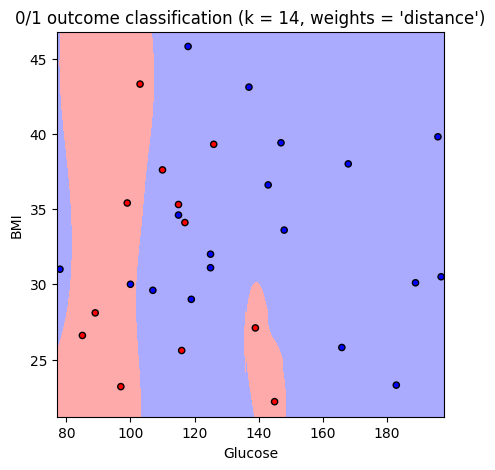

----------------------------------------------------------------------
Classification report
----------------------------------------------------------------------

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.44      0.80      0.57         5

    accuracy                           0.40        10
   macro avg       0.22      0.40      0.29        10
weighted avg       0.22      0.40      0.29        10

----------------------------------------------------------------------
Accuracy =   0.7
----------------------------------------------------------------------


In [12]:
# we only take the best two features and prepare them for the KNN classifier
rows_nbr = 30
X_prime  = np.array(data.iloc[:rows_nbr, [1,5]])
X        = preprocessing.scale(X_prime)
X        = X_prime
y        = np.array(data.iloc[:rows_nbr, 8])

# classify, evaluate and plot results
classify_and_plot(X, y)